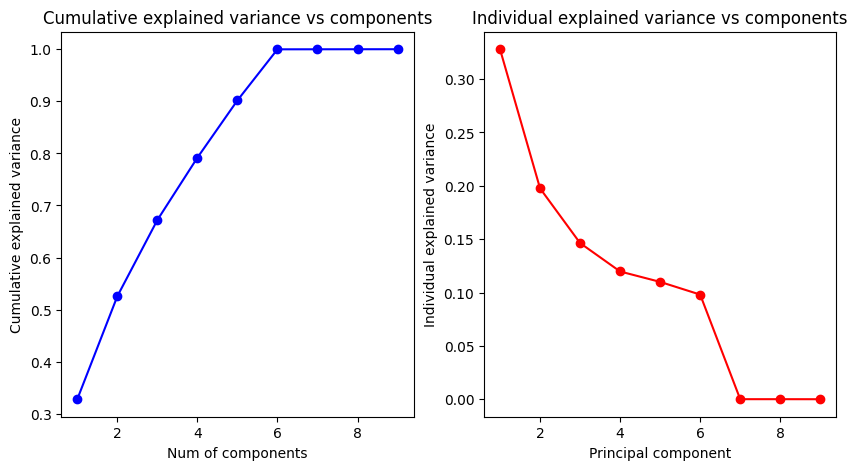

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pyod.models.pca import PCA
from scipy.io import loadmat
from pyod.models.kpca import KPCA
from sklearn.metrics import balanced_accuracy_score

data = loadmat('/kaggle/input/shuttle-mat/shuttle.mat')
X = data['X']
y = data['y']

contamination = np.sum(y) / len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(contamination=contamination)
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Num of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance vs components')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'ro-')
plt.xlabel('Principal component')
plt.ylabel('Individual explained variance')
plt.title('Individual explained variance vs components')
plt.show()

In [ ]:
pca = PCA(contamination=contamination)
pca.fit(X_train_scaled)
y_train_pred_pca = pca.labels_
y_test_pred_pca = pca.predict(X_test_scaled)

pca_train_score = balanced_accuracy_score(y_train, y_train_pred_pca)
pca_test_score = balanced_accuracy_score(y_test, y_test_pred_pca)

print("PCA Results:")
print(f"Training Balanced Accuracy: {pca_train_score}")
print(f"Testing Balanced Accuracy: {pca_test_score}")

kpca = KPCA(contamination=contamination)
kpca.fit(X_train_scaled)
y_train_pred_kpca = kpca.labels_
y_test_pred_kpca = kpca.predict(X_test_scaled)

kpca_train_score = balanced_accuracy_score(y_train, y_train_pred_kpca)
kpca_test_score = balanced_accuracy_score(y_test, y_test_pred_kpca)

print()
print("KPCA Results:")
print(f"Training Balanced Accuracy: {kpca_train_score}")
print(f"Testing Balanced Accuracy: {kpca_test_score}")

PCA Results:
Training Balanced Accuracy: 0.9752082461478256
Testing Balanced Accuracy: 0.9708779881524603
